Use any additional libraries you want, but if you don't explicitly code stuff that I have explicitly asked you to code, you will not get marks.

### Q1. Kernel k-means

Let's try and end our course on a happy note. The smiley dataset you see below is made up of many clusters of points. 

In [1]:
import numpy as np
import numpy.linalg as lin
import numpy.random as rnd
from matplotlib import pyplot as plt


def getFigure( sizex = 7, sizey = 7 ):
    fig = plt.figure( figsize = (sizex, sizey) )
    return fig

def plot2D( X, fig, color = 'r', marker = '+', size = 100, empty = False ):
    plt.figure( fig.number )
    if empty:
        plt.scatter( X[:,0], X[:,1], s = size, facecolors = 'none', edgecolors = color, marker = marker  )
    else:
        plt.scatter( X[:,0], X[:,1], s = size, c = color, marker = marker )


def genCrescentData( d, n, mu, r, flipped = False ):
    X = np.vstack( (np.cos( np.linspace( 0, np.pi, n ) ), np.sin( np.linspace( 0, np.pi, n ) ) ) ).T
    if flipped:
        X[:,1] = -np.abs( X[:,1] )
    else:
        X[:,1] = np.abs( X[:,1] )
    X = (X * r) + mu
    return X

def genSphericalData( d, n, mu, r ):
    X = rnd.normal( 0, 1, (n, d) )
    norms = lin.norm( X, axis = 1 )
    X = X / norms[:, np.newaxis]
    X = (X * r) + mu
    return X

In [2]:
d = 2
n = 200

mu1 = np.array( [0,0] )
mu2 = np.array( [0,1] )
mu3 = np.array( [0,0] )
mu4 = np.array( [-3,5] )
mu5 = np.array( [3,5] )

tmp1 = genCrescentData( d, n, mu1, 1 )
tmp2 = genCrescentData( d, n, mu2, 5, flipped = True )
tmp3 = genSphericalData( d, n, mu3, 10 )
tmp4 = genSphericalData( d, n, mu4, 1 )
tmp5 = genSphericalData( d, n, mu5, 1 )
X = np.vstack( (tmp1, tmp2, tmp3, tmp4, tmp5) )

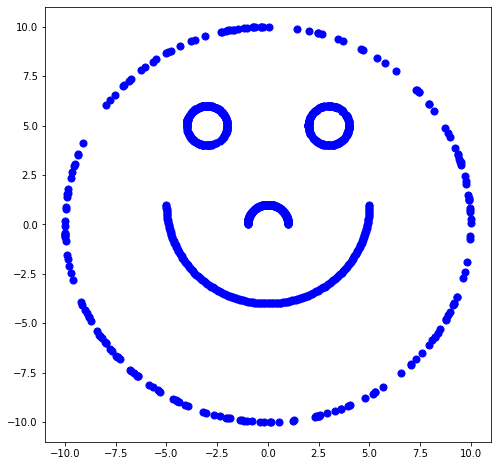

In [3]:
fig = getFigure( 8, 8 )
plot2D( X, fig, size = 50, color = 'b', marker = 'o' )

(a) Can you implement the k-means algorithm to cluster this dataset? Visualize your output. [10 points] 

(b) Implement k-means++ to initialize cluster centers usefully. [5 points]

(c) What value of k gives you the best clustering? Are you happy with the quality of the clustering? [5 points]


(d) I'm going to say that we want to be able to do better than this. So I want you to kernelize your k-means algorithm with a Gaussian kernel. Visualize the clustering output of your kernel k-means algorithm [15 points]

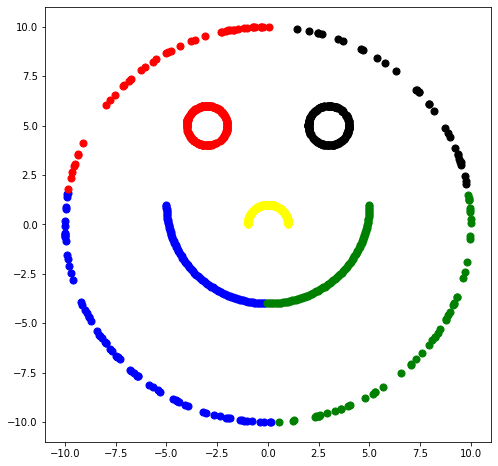

In [4]:
means =np.array([[-10,1], [-5.5,7.5],[7,2],[0,0],[7,7]])

flag = 1
while flag != 5:
    flag = 0
    temp = [[],[],[],[],[]]
    dist = np.array([])
    for i in X:
        dist = np.array([])
        for j in means:
            dist = np.concatenate([dist,[lin.norm([j-i])]])
        sel = np.argmin(dist)
        temp[sel].append(i)
    new_mean = np.array([])
    for i in range(0,len(means)):
        x = np.array(np.mean(temp[i],axis=0))
        new_mean = np.concatenate((new_mean,x),axis=0)
        if np.all((x-means[i])<0.000001):
            flag = flag+1
    means = new_mean.reshape(5,2)



fig = getFigure( 8, 8 )
plot2D( np.array(temp[0]), fig, size = 50, color = 'blue', marker = 'o' )
plot2D( np.array(temp[1]), fig, size = 50, color = 'red', marker = 'o' )
plot2D( np.array(temp[2]), fig, size = 50, color = 'green', marker = 'o' )
plot2D( np.array(temp[3]), fig, size = 50, color = 'yellow', marker = 'o' )
plot2D( np.array(temp[4]), fig, size = 50, color = 'black', marker = 'o' )

In [122]:
def kmeansp(X,counts):
    means = np.array([])
    Y = X
    sel = np.random.randint(0,len(Y))
    Y = np.delete(Y,sel,axis=0)
    means = np.append([means],[X[sel]],axis=1)
    count = 1
    while count<counts:
        points_dist = []
        for j in Y:
            min = -1
            for i in means:
                dist = lin.norm([j-i])
                if min==-1 or dist < min:
                    min = dist
            points_dist.append(min**2)
        sum_a = sum(points_dist)
        prob = np.array([])
        for i in range(0,len(points_dist)):
            prob = np.append(prob,(points_dist[i]/sum_a))
            points_dist[i] = i
        t = np.random.choice(points_dist,1,p=prob)
        means = np.vstack((means,Y[t]))
        Y = np.delete(Y,t,axis=0)
        count = count + 1

    while True:
        flag = 0
        temp = [[] for i in range(counts)]
        dist = np.array([])
        for i in X:
            dist = np.array([])
            dist = lin.norm(means-i,axis=1)
            sel = np.argmin(dist)
            temp[sel].append(i)
        for i in range(0,len(means)):
            x = np.array(np.mean(temp[i],axis=0))
            if np.all((x-means[i])<0.000001):
                flag = flag+1
            means[i] = x
        if flag == counts:
            break


    #fig = getFigure( 8, 8 )
    #plot2D( np.array(temp[0]), fig, size = 50, color = 'blue', marker = 'o' )
    #plot2D( np.array(temp[1]), fig, size = 50, color = 'red', marker = 'o' )
    #plot2D( np.array(temp[2]), fig, size = 50, color = 'green', marker = 'o' )
    #plot2D( np.array(temp[3]), fig, size = 50, color = 'yellow', marker = 'o' )
    #plot2D( np.array(temp[4]), fig, size = 50, color = 'black', marker = 'o' )
    return temp,means

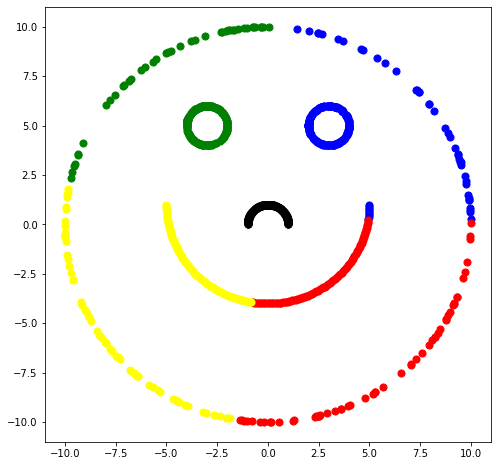

In [123]:
temp, cluster = kmeansp(X,5)

fig = getFigure( 8, 8 )
plot2D( np.array(temp[0]), fig, size = 50, color = 'blue', marker = 'o' )
plot2D( np.array(temp[1]), fig, size = 50, color = 'red', marker = 'o' )
plot2D( np.array(temp[2]), fig, size = 50, color = 'green', marker = 'o' )
plot2D( np.array(temp[3]), fig, size = 50, color = 'yellow', marker = 'o' )
plot2D( np.array(temp[4]), fig, size = 50, color = 'black', marker = 'o' )

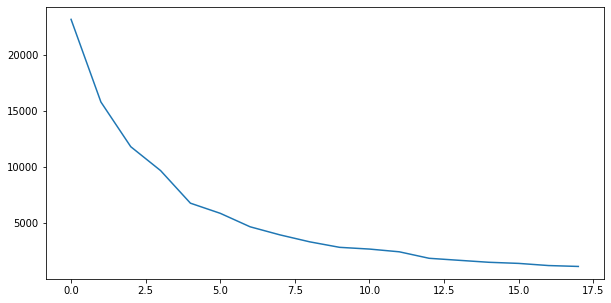

In [7]:
elbow = []
for i in range(2,20):
    cluster, centers = kmeansp(X,i)
    sum_sq = 0
    for j in range(len(centers)):
        centroid = np.mean(cluster[j],axis=0)
        for k in cluster[j]:
            sum_sq=sum_sq + (lin.norm([centroid-k]))**2
    elbow.append(sum_sq)

plt.figure(figsize=(10,5))
plt.plot(elbow)

In [8]:
def kernel(x,y,var):
    dis = lin.norm(x-y)**2/(2*(var**2))
    res = np.exp(-dis)
    return res

In [9]:
means =np.array([[-10,1], [-5.5,7.5],[7,2],[0,0],[7,7]])
flag = 1
new_temp = []
while flag != 5:
    flag = 0
    temp = [[],[],[],[],[]]
    dist = np.array([])
    for i in X:
        dist = np.array([])
        for j in means:
            dist = np.concatenate([dist,[kernel(i,j,0.09)]])
        sel = np.argmax(dist)
        temp[sel].append(i)
    new_mean = np.array([])
    for i in range(0,len(means)):
        x = np.array(np.mean(temp[i],axis=0))
        if len(new_temp)!=0:
            if np.array_equiv(temp[i],new_temp[i]):
                flag = flag+1
        means[i] = x
    new_temp = temp[:]

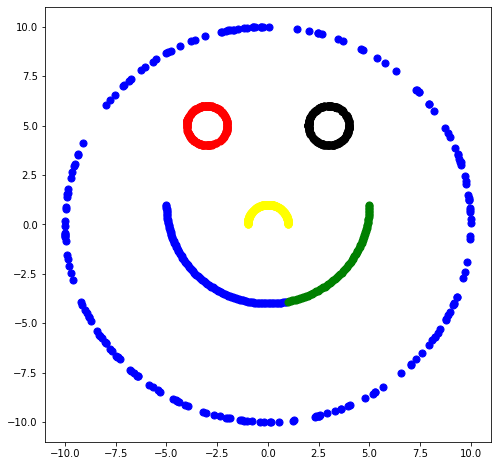

In [10]:
fig = getFigure( 8, 8 )
plot2D( np.array(temp[0]), fig, size = 50, color = 'blue', marker = 'o' )
plot2D( np.array(temp[1]), fig, size = 50, color = 'red', marker = 'o' )
plot2D( np.array(temp[2]), fig, size = 50, color = 'green', marker = 'o' )
plot2D( np.array(temp[3]), fig, size = 50, color = 'yellow', marker = 'o' )
plot2D( np.array(temp[4]), fig, size = 50, color = 'black', marker = 'o' )

### Q2. Expectation-Maximization

We saw how to use EM to learn parameters for Gaussian mixture models last week. Specifically, for a GMM described by the set of parameters $\{\pi_k, \mu_k, \Sigma_k \}_{k=1}^K$, we saw that the E-step boils down to figuring out the expected assignment of clusters based on a responsibility judgment proportional to $\pi_k~N(\mu_k, \Sigma_k)$, given curent parameter estimates, followed by using GDA MLE updates assuming the current expected assignment in the M-step to update parameter values.

(a) Can you derive the E-step and M-step for an EM algorithm that would work for a Gaussian mixture model wherein the mixture weights $\pi_k$ are known, and the covariances are restricted to be spherical, i.e. $\Sigma_k = \sigma^2_k I$? [20 points]

(b) Implement this algorithm and show that it works on synthetic data with 3 clusters. If you are unable to derive the EM algorithm for part (a), implement the EM algorithm I showed in the class slides for the standard GMM (5 point penalty for taking this option) [15 points]. 

In [75]:
from sklearn.datasets import make_blobs
x , z,y =make_blobs(n_samples=600, centers=[[1,1],[5,5],[8,8]], cluster_std=0.5 ,n_features=2,random_state=0,return_centers=True)

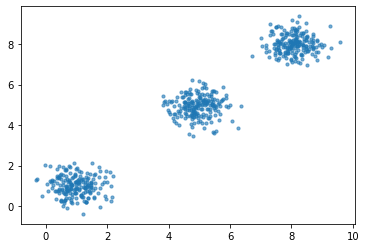

In [76]:
plt.scatter(x[:,0], x[:,1], alpha = 0.6, s=10)

In [65]:
def density(x, d, mean, covariance):
    x_m = x - mean
    res = (1. / (np.sqrt((2 * np.pi)**d * np.linalg.det(covariance))) * np.exp(-(np.linalg.solve(covariance, x_m).T.dot(x_m)) / 2))
    return res    


In [97]:
mean = np.array([[2.,2.],[6.,6.],[10.,10.]])
a = np.array([[1.,0.],[0.,1.]])
sigma_old = np.array([1.,1.,1.])

while True:
    
    cov1 = sigma_old[0]*a
    cov2 = sigma_old[1]*a
    cov3 = sigma_old[2]*a

    w1 = []
    w2 = []
    w3 = []

    for i in x:
        weight = (1/3)*density(i,2,mean[0],cov1)
        weight = weight/((1/3)*density(i,2,mean[0],cov1) + (1/3)*density(i,2,mean[1],cov2) + (1/3)*density(i,2,mean[2],cov3))
        w1.append(weight)
    for i in x:
        weight = (1/3)*density(i,2,mean[1],cov2)
        weight = weight/((1/3)*density(i,2,mean[0],cov1) + (1/3)*density(i,2,mean[1],cov2) + (1/3)*density(i,2,mean[2],cov3))
        w2.append(weight)
    for i in x:
        weight = (1/3)*density(i,2,mean[2],cov3)
        weight = weight/((1/3)*density(i,2,mean[0],cov1) + (1/3)*density(i,2,mean[1],cov2) + (1/3)*density(i,2,mean[2],cov3))
        w3.append(weight)

    a1 = np.array([[0.,0.],[0.,0.],[0.,0.]])
    sigma = np.array([0.,0.,0.])
    for i in range(0,len(x)):
        a1[0] = a1[0] + x[i]*w1[i]
        a1[1] = a1[1] + x[i]*w2[i]
        a1[2] = a1[2] + x[i]*w3[i]
        sigma[0] = sigma[0] + w1[i]*lin.norm(x[i]-mean[0])
        sigma[1] = sigma[1] + w2[i]*lin.norm(x[i]-mean[1])
        sigma[2] = sigma[2] + w3[i]*lin.norm(x[i]-mean[2])

    a1[0] = a1[0]/sum(w1)
    a1[1] = a1[1]/sum(w2)
    a1[2] = a1[2]/sum(w3)
    sigma[0] =sigma[0]/(sum(w1)*2)
    sigma[1] =sigma[1]/(sum(w2)*2)
    sigma[2] =sigma[2]/(sum(w3)*2)

    if np.all(sigma-sigma_old<0.0001) and np.all(mean-a1<0.0001):
        break
    else:
        sigma_old = sigma[:]
        mean = a1[:]



In [98]:
mean

array([[0.963991  , 1.00745701],
       [4.94627029, 4.93521906],
       [8.07212137, 8.00983892]])

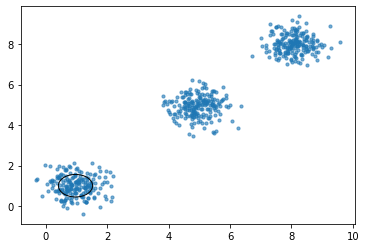

In [121]:
fig, ax = plt.subplots()
circle1 = plt.Circle((mean[0][0],mean[0][1]),np.sqrt(sigma[0]),color='black',fill=False)
ax.add_patch(circle1)
dot = plt.scatter(x[:,0], x[:,1], alpha = 0.6, s=10)

plt.show()

0.31024472977297374